In [263]:
import tqdm
import json

import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

In [255]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [256]:
from funk_svd.dataset import fetch_ml_ratings
from funk_svd import SVD

from sklearn.metrics import mean_absolute_error

In [368]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [384]:
BOTIFY_DATA_DIR = "C:/Users/skienbear/Desktop/Made/recsys/hw1/recsys-itmo-spring-2023/botify/data/"

# data = pd.read_json("C:/Users/skienbear/Desktop/Made/recsys/hw1/log/data.json", lines=True)[["user", "time", "track"]].copy()
data = pd.read_json("C:/Users/skienbear/Desktop/Made/recsys/hw1/log/data.json", lines=True).drop_duplicates(subset=["user", "track"])

data

,message,timestamp,user,track,time,latency,recommendation,experiments
0,next,2023-04-12 13:32:54.774,3255,2659,1.00,0.102098,1998.0,{'HW': 'C'}
1,next,2023-04-12 13:32:54.929,3255,1998,1.00,0.003442,178.0,{'HW': 'C'}
2,next,2023-04-12 13:32:54.955,3255,178,1.00,0.002904,442.0,{'HW': 'C'}
3,next,2023-04-12 13:32:54.974,3255,442,1.00,0.002299,157.0,{'HW': 'C'}
4,next,2023-04-12 13:32:54.991,3255,157,1.00,0.002177,297.0,{'HW': 'C'}
...,...,...,...,...,...,...,...,...
8779,next,2023-04-12 13:38:27.198,411,18068,0.00,0.001363,11648.0,{'HW': 'C'}
8780,next,2023-04-12 13:38:27.217,411,11648,0.03,0.001306,2816.0,{'HW': 'C'}
8781,next,2023-04-12 13:38:27.248,411,2816,1.00,0.001808,1141.0,{'HW': 'C'}
8782,next,2023-04-12 13:38:27.276,411,1141,0.80,0.002362,36438.0,{'HW': 'C'}


In [386]:
df

,user_id,track_id,rating
0,3255,2659,1.00
1,3255,1998,1.00
2,3255,178,1.00
3,3255,442,1.00
4,3255,157,1.00
...,...,...,...
8779,411,18068,0.00
8780,411,11648,0.03
8781,411,2816,1.00
8782,411,1141,0.80


In [398]:
df.columns = ['u_id', 'i_id', 'rating']

In [399]:
train = df.sample(frac=0.8, random_state=7)

In [400]:
train

,u_id,i_id,rating
5697,2798,5414,0.26
5893,2712,28444,0.04
5575,3379,428,0.08
763,647,2225,0.00
8407,8221,2241,0.41
...,...,...,...
2224,4185,3220,0.43
6408,2406,2488,0.00
4229,5370,7546,0.00
4260,4089,6412,0.00


In [401]:
val = df.drop(train.index.tolist()).sample(frac=0.5, random_state=8)

In [402]:
val

,u_id,i_id,rating
3356,657,11746,0.80
3044,9937,36981,0.51
288,733,5079,1.00
5028,3568,30154,1.00
2626,7479,25499,0.00
...,...,...,...
1851,9436,14553,0.80
6105,6169,4113,0.70
7170,9830,1083,1.00
1167,2106,162,0.80


In [403]:
test = df.drop(train.index.tolist()).drop(val.index.tolist())

In [404]:
test

,u_id,i_id,rating
14,3255,410,1.00
19,3255,140,1.00
22,1225,19511,0.10
43,4432,4511,0.33
49,1946,1997,0.58
...,...,...,...
8728,7781,6944,0.03
8746,2126,4210,1.00
8747,2126,16991,0.80
8760,2293,14545,1.00


<AxesSubplot:>

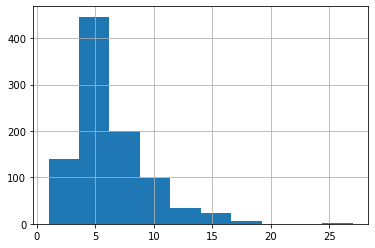

In [405]:
train['u_id'].value_counts().hist()

In [412]:
maes = []
for i in [1]:
    svd = SVD(lr=0.01, reg=0.005, n_epochs=1000, n_factors=i, early_stopping=True, shuffle=True, min_rating=0, max_rating=1)          
    svd.fit(X=train, X_val=val)
    pred = svd.predict(test)
    mae = mean_absolute_error(test['rating'], pred)
    maes.append(mae)

Preprocessing data...

Preprocessing data...

Epoch 1/1000  | val_loss: 0.15 - val_rmse: 0.38 - val_mae: 0.35 - took 0.0 sec
Epoch 2/1000  | val_loss: 0.14 - val_rmse: 0.38 - val_mae: 0.35 - took 0.0 sec
Epoch 3/1000  | val_loss: 0.14 - val_rmse: 0.38 - val_mae: 0.34 - took 0.0 sec
Epoch 4/1000  | val_loss: 0.14 - val_rmse: 0.38 - val_mae: 0.34 - took 0.0 sec
Epoch 5/1000  | val_loss: 0.14 - val_rmse: 0.37 - val_mae: 0.34 - took 0.0 sec
Epoch 6/1000  | val_loss: 0.14 - val_rmse: 0.37 - val_mae: 0.34 - took 0.0 sec

Training took 0 sec


In [408]:
svd.fit(train)

Preprocessing data...

Epoch 1/1000  | took 0.0 sec
Epoch 2/1000  | took 0.0 sec
Epoch 3/1000  | took 0.0 sec
Epoch 4/1000  | took 0.0 sec
Epoch 5/1000  | took 0.0 sec
Epoch 6/1000  | took 0.0 sec
Epoch 7/1000  | took 0.0 sec
Epoch 8/1000  | took 0.0 sec
Epoch 9/1000  | took 0.0 sec
Epoch 10/1000 | took 0.0 sec
Epoch 11/1000 | took 0.0 sec
Epoch 12/1000 | took 0.0 sec
Epoch 13/1000 | took 0.0 sec
Epoch 14/1000 | took 0.0 sec
Epoch 15/1000 | took 0.0 sec
Epoch 16/1000 | took 0.0 sec
Epoch 17/1000 | took 0.0 sec
Epoch 18/1000 | took 0.0 sec
Epoch 19/1000 | took 0.0 sec
Epoch 20/1000 | took 0.0 sec
Epoch 21/1000 | took 0.0 sec
Epoch 22/1000 | took 0.0 sec
Epoch 23/1000 | took 0.0 sec
Epoch 24/1000 | took 0.0 sec
Epoch 25/1000 | took 0.0 sec
Epoch 26/1000 | took 0.0 sec
Epoch 27/1000 | took 0.0 sec
Epoch 28/1000 | took 0.0 sec
Epoch 29/1000 | took 0.0 sec
Epoch 30/1000 | took 0.0 sec
Epoch 31/1000 | took 0.0 sec
Epoch 32/1000 | took 0.0 sec
Epoch 33/1000 | took 0.0 sec
Epoch 34/1000 | took

Epoch 351/1000 | took 0.0 sec
Epoch 352/1000 | took 0.0 sec
Epoch 353/1000 | took 0.0 sec
Epoch 354/1000 | took 0.0 sec
Epoch 355/1000 | took 0.0 sec
Epoch 356/1000 | took 0.0 sec
Epoch 357/1000 | took 0.0 sec
Epoch 358/1000 | took 0.0 sec
Epoch 359/1000 | took 0.0 sec
Epoch 360/1000 | took 0.0 sec
Epoch 361/1000 | took 0.0 sec
Epoch 362/1000 | took 0.0 sec
Epoch 363/1000 | took 0.0 sec
Epoch 364/1000 | took 0.0 sec
Epoch 365/1000 | took 0.0 sec
Epoch 366/1000 | took 0.0 sec
Epoch 367/1000 | took 0.0 sec
Epoch 368/1000 | took 0.0 sec
Epoch 369/1000 | took 0.0 sec
Epoch 370/1000 | took 0.0 sec
Epoch 371/1000 | took 0.0 sec
Epoch 372/1000 | took 0.0 sec
Epoch 373/1000 | took 0.0 sec
Epoch 374/1000 | took 0.0 sec
Epoch 375/1000 | took 0.0 sec
Epoch 376/1000 | took 0.0 sec
Epoch 377/1000 | took 0.0 sec
Epoch 378/1000 | took 0.0 sec
Epoch 379/1000 | took 0.0 sec
Epoch 380/1000 | took 0.0 sec
Epoch 381/1000 | took 0.0 sec
Epoch 382/1000 | took 0.0 sec
Epoch 383/1000 | took 0.0 sec
Epoch 384/

Epoch 635/1000 | took 0.0 sec
Epoch 636/1000 | took 0.0 sec
Epoch 637/1000 | took 0.0 sec
Epoch 638/1000 | took 0.0 sec
Epoch 639/1000 | took 0.0 sec
Epoch 640/1000 | took 0.0 sec
Epoch 641/1000 | took 0.0 sec
Epoch 642/1000 | took 0.0 sec
Epoch 643/1000 | took 0.0 sec
Epoch 644/1000 | took 0.0 sec
Epoch 645/1000 | took 0.0 sec
Epoch 646/1000 | took 0.0 sec
Epoch 647/1000 | took 0.0 sec
Epoch 648/1000 | took 0.0 sec
Epoch 649/1000 | took 0.0 sec
Epoch 650/1000 | took 0.0 sec
Epoch 651/1000 | took 0.0 sec
Epoch 652/1000 | took 0.0 sec
Epoch 653/1000 | took 0.0 sec
Epoch 654/1000 | took 0.0 sec
Epoch 655/1000 | took 0.0 sec
Epoch 656/1000 | took 0.0 sec
Epoch 657/1000 | took 0.0 sec
Epoch 658/1000 | took 0.0 sec
Epoch 659/1000 | took 0.0 sec
Epoch 660/1000 | took 0.0 sec
Epoch 661/1000 | took 0.0 sec
Epoch 662/1000 | took 0.0 sec
Epoch 663/1000 | took 0.0 sec
Epoch 664/1000 | took 0.0 sec
Epoch 665/1000 | took 0.0 sec
Epoch 666/1000 | took 0.0 sec
Epoch 667/1000 | took 0.0 sec
Epoch 668/

Epoch 940/1000 | took 0.0 sec
Epoch 941/1000 | took 0.0 sec
Epoch 942/1000 | took 0.0 sec
Epoch 943/1000 | took 0.0 sec
Epoch 944/1000 | took 0.0 sec
Epoch 945/1000 | took 0.0 sec
Epoch 946/1000 | took 0.0 sec
Epoch 947/1000 | took 0.0 sec
Epoch 948/1000 | took 0.0 sec
Epoch 949/1000 | took 0.0 sec
Epoch 950/1000 | took 0.0 sec
Epoch 951/1000 | took 0.0 sec
Epoch 952/1000 | took 0.0 sec
Epoch 953/1000 | took 0.0 sec
Epoch 954/1000 | took 0.0 sec
Epoch 955/1000 | took 0.0 sec
Epoch 956/1000 | took 0.0 sec
Epoch 957/1000 | took 0.0 sec
Epoch 958/1000 | took 0.0 sec
Epoch 959/1000 | took 0.0 sec
Epoch 960/1000 | took 0.0 sec
Epoch 961/1000 | took 0.0 sec
Epoch 962/1000 | took 0.0 sec
Epoch 963/1000 | took 0.0 sec
Epoch 964/1000 | took 0.0 sec
Epoch 965/1000 | took 0.0 sec
Epoch 966/1000 | took 0.0 sec
Epoch 967/1000 | took 0.0 sec
Epoch 968/1000 | took 0.0 sec
Epoch 969/1000 | took 0.0 sec
Epoch 970/1000 | took 0.0 sec
Epoch 971/1000 | took 0.0 sec
Epoch 972/1000 | took 0.0 sec
Epoch 973/

In [413]:
maes

[0.31888128109139185]

In [414]:
pred = svd.predict(test)

In [415]:
pred

[0.9301931021525182,
 0.9073541346030147,
 0.45362704675766513,
 0.5037032537976014,
 0.6355768796253487,
 0.6367688613545142,
 0.5316043702177988,
 0.5244313334117234,
 0.4378793911725618,
 0.5633468457886114,
 0.5541379596055783,
 0.540671783947344,
 0.540671783947344,
 0.5238618182981328,
 0.8011715028011493,
 0.8387617116697146,
 0.5052281514626125,
 0.4224095987830009,
 0.40372607658660076,
 0.39597565180996885,
 0.5099794145889623,
 0.4936351433971525,
 0.4493849791231245,
 0.5136415481603305,
 0.48655512556220865,
 0.4495809276365846,
 0.4495809276365846,
 0.4495809276365846,
 0.4917969013035062,
 0.46923487355153876,
 0.44418063934841895,
 0.5011358513971573,
 0.5024401520588739,
 0.5306882432125227,
 0.42074395424997363,
 0.4506722338505396,
 0.7182439029569007,
 0.4661020425103053,
 0.49207435120519133,
 0.6261600358542772,
 0.6067049406608879,
 0.5437962346606228,
 0.5070776136569853,
 0.4818142056382217,
 0.503039744021556,
 0.6447554091365728,
 0.40909621426097537,
 0.7658

In [416]:
test.i_id.unique().max()

49993

In [417]:
mae = mean_absolute_error(test['rating'], pred)

In [418]:
print(f'Test MAE: {mae:.2f}')

Test MAE: 0.32


In [419]:
pred = svd.predict(test)

In [ ]:
with open(BOTIFY_DATA_DIR + "hw1.json", "w") as rf:
    for user_index in range(10000):
        df_run = pd.DataFrame({'u_id': [user_index]*50000, 'i_id': list(range(50000))})
        predictions = np.array(svd.predict(df_run))
        top = np.argsort(predictions)[-100:]#.astype(int)
        recommendation = {
            "user": user_index,
            "tracks": list(map(int, top))
        }
        rf.write(json.dumps(recommendation) + "\n")